In [8]:
from astropy.table import Table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

In [4]:
base = 'Filters'
filters = ['CFHT_MegaCam.u.dat', 'Subaru_HSC.g.dat', 
           'Subaru_HSC.r.dat', 'Subaru_HSC.i.dat', 
           'Subaru_HSC.z.dat', 'Subaru_HSC.Y.dat', 
           'Euclid_VIS.vis.dat', 'Euclid_NISP.Y.dat', 
           'Euclid_NISP.J.dat', 'Euclid_NISP.H.dat', 
           'Spitzer_IRAC.I1.dat', 'Spitzer_IRAC.I2.dat']

full_path = [f'{base}/{x}' for x in filters]

In [12]:
def eff_wave(filter):

    tab = Table.read(filter, format = 'ascii')

    wave = tab['col1']
    tlam = tab['col2']

    num = wave * tlam
    denom = tlam

    int_num = trapezoid(num, x = wave)
    int_denom = trapezoid(denom, x = wave)

    lambda_eff = int_num/int_denom

    return lambda_eff

In [19]:
eff_wave_arr

array([ 3681.72352534,  4816.11014663,  6234.11063924,  7740.57975725,
        8911.61988204,  9779.92802444,  7180.86242252, 10812.42977628,
       13669.52984677, 17707.85350928, 35572.59280879, 45049.2742452 ])

In [70]:
def plot_filter_curves(filter_files, ax = None, scale = 1):

    if not ax:
        fig, ax = plt.subplots(figsize = (12, 6))
    
        for file in filter_files:
            tab = Table.read(file, format = 'ascii')
            wave = tab['col1']
            tlam = tab['col2']
                
            ax.plot(wave, tlam*scale)
        
        ax.set_xlabel(r'Wavelength [$\AA$]', fontsize = 20)

        return fig, ax

    else:

        for file in filter_files:
            tab = Table.read(file, format = 'ascii')
            wave = tab['col1']
            tlam = tab['col2']
                
            ax.plot(wave, tlam*scale)
        
        ax.set_xlabel(r'Wavelength [$\AA$]', fontsize = 20)

        return ax

        

In [35]:
import bagpipes as pipes

In [109]:
z = 0.5
dust = {}                         
dust["type"] = "Calzetti"         
dust["Av"] = 0.2                  
dust["eta"] = 3.                  

nebular = {}                      
nebular["logU"] = -3.             

dblplaw = {}
dblplaw["tau"] = 5.
dblplaw["alpha"] = 2.5
dblplaw["beta"] = 10.
dblplaw["massformed"] = 10.
dblplaw["metallicity"] = 0.5

burst1 = {}
burst1["age"] = 0.2
burst1["massformed"] = 7.
burst1["metallicity"] = 1.

burst2 = {}
burst2["age"] = 3.
burst2["massformed"] = 7.5
burst2["metallicity"] = 0.2

model_components = {}                   
model_components["redshift"] = z      
model_components["veldisp"] = 200. 
model_components["burst1"] = burst1
model_components["burst2"] = burst2
model_components["dblplaw"] = dblplaw
model_components["dust"] = dust
model_components["nebular"] = nebular

model = pipes.model_galaxy(model_components,filt_list=full_path)

In [98]:
def convert_fnu(wave, flux):

    c_A_s = 3e18

    conv = wave**2/c_A_s

    fnu = flux*conv

    return fnu

(1e-30, 1e-27)

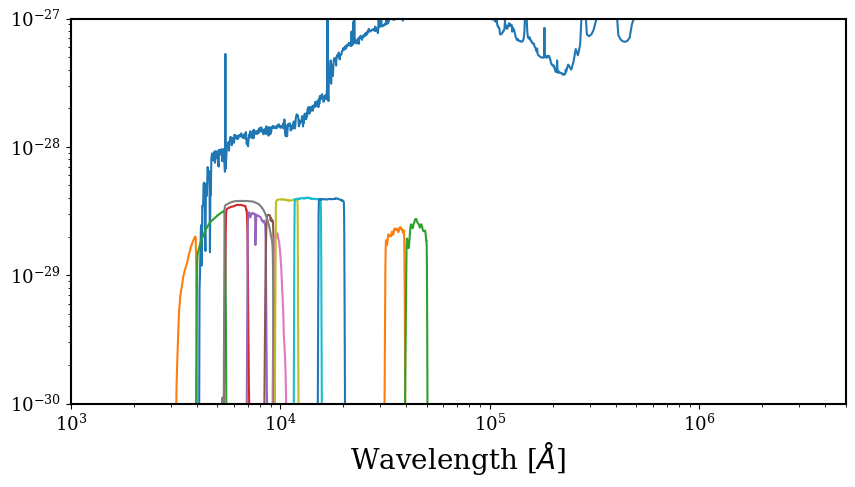

In [119]:
z = 3.5
fig, ax = plt.subplots(figsize = (10, 5))

ax.loglog(model.wavelengths * (1+z), convert_fnu(model.wavelengths*(1+z), model.spectrum_full))
ax = plot_filter_curves(full_path, ax = ax, scale = 5e-29)
ax.set_xlim(1e3, 5e6)
ax.set_ylim(1e-30, 1e-27)

In [121]:
from scipy.optimize import curve_fit

In [ ]:
#Bands of Interest
#Redshift 2: u, g, r, i (UV) NISP J, H  and IRAC Ch1 and CH2  (Optical)
#Redshift 2.5: g, r, i, z (UV) NISP H  and IRAC Ch1 and CH2  (Optical)
#Redshift 3:  r, i, z (UV) NISP H (maybe)  and IRAC Ch1 and CH2  (Optical)
#Redshift 3.5:  i, z, y (UV) and IRAC Ch1 and CH2 (Optical)

In [120]:
def model(eff_lam, beta, c):

    return -2.5 * (beta +2) *np.log10(eff_lam) + c

In [122]:
euclid_tab = Table.read('edfn_dawn_catalog_sept2024.fits')

In [ ]:
eucid_tab

In [ ]:
def find_beta(mag, eff_lam):

    